# **Bank Personal Loan Data Analysis**

Data acquired from kaggle: https://www.kaggle.com/krantiswalke/bank-personal-loan-modelling 

**Data Description**

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

**Columns Description:**

* ID : Customer ID
* Age : Customer's age in completed years
* Experience : #years of professional experience
* Income : Annual income of the customer ($000)
* ZIP Code : Home Address ZIP code.
* Family : Family size of the customer
* CCAvg : Avg. spending on credit cards per month ($000)
* Education : Education Level.
* * 1: Undergrad;
* * 2: Graduate;
* * 3: Advanced/Professional
* Mortgage : Value of house mortgage if any. ($000)
* 10.Personal Loan : Did this customer accept the personal loan offered in the last campaign?
* 11.Securities Account : Does the customer have a securities account with the bank?
* 12.CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
* 13.Online : Does the customer use internet banking facilities?
* 14.Credit card : Does the customer use a credit card issued by

**Importing Necessary Libraries**

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot
import warnings
warnings.filterwarnings('ignore')

**Reading Data**

In [4]:
df = pd.read_excel(
    r'E:\Data_Analysis_Projects\Bank_personal_loan\data\Bank_Personal_Loan_Modelling.xlsx',  1)


In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.shape

(5000, 14)

In [5]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
df.drop(['ID','ZIP Code'], axis = 1, inplace = True)

In [7]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [8]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**If we look at the above data carefully, we can see that there are some values in the experience column which is negative. This cannot be possible so we will have to correct it in some measure.**

In [9]:
df.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598457
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'CCAvg'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Mortgage'}>,
        <AxesSubplot:title={'center':'Personal Loan'}>,
        <AxesSubplot:title={'center':'Securities Account'}>],
       [<AxesSubplot:title={'center':'CD Account'}>,
        <AxesSubplot:title={'center':'Online'}>,
        <AxesSubplot:title={'center':'CreditCard'}>]], dtype=object)

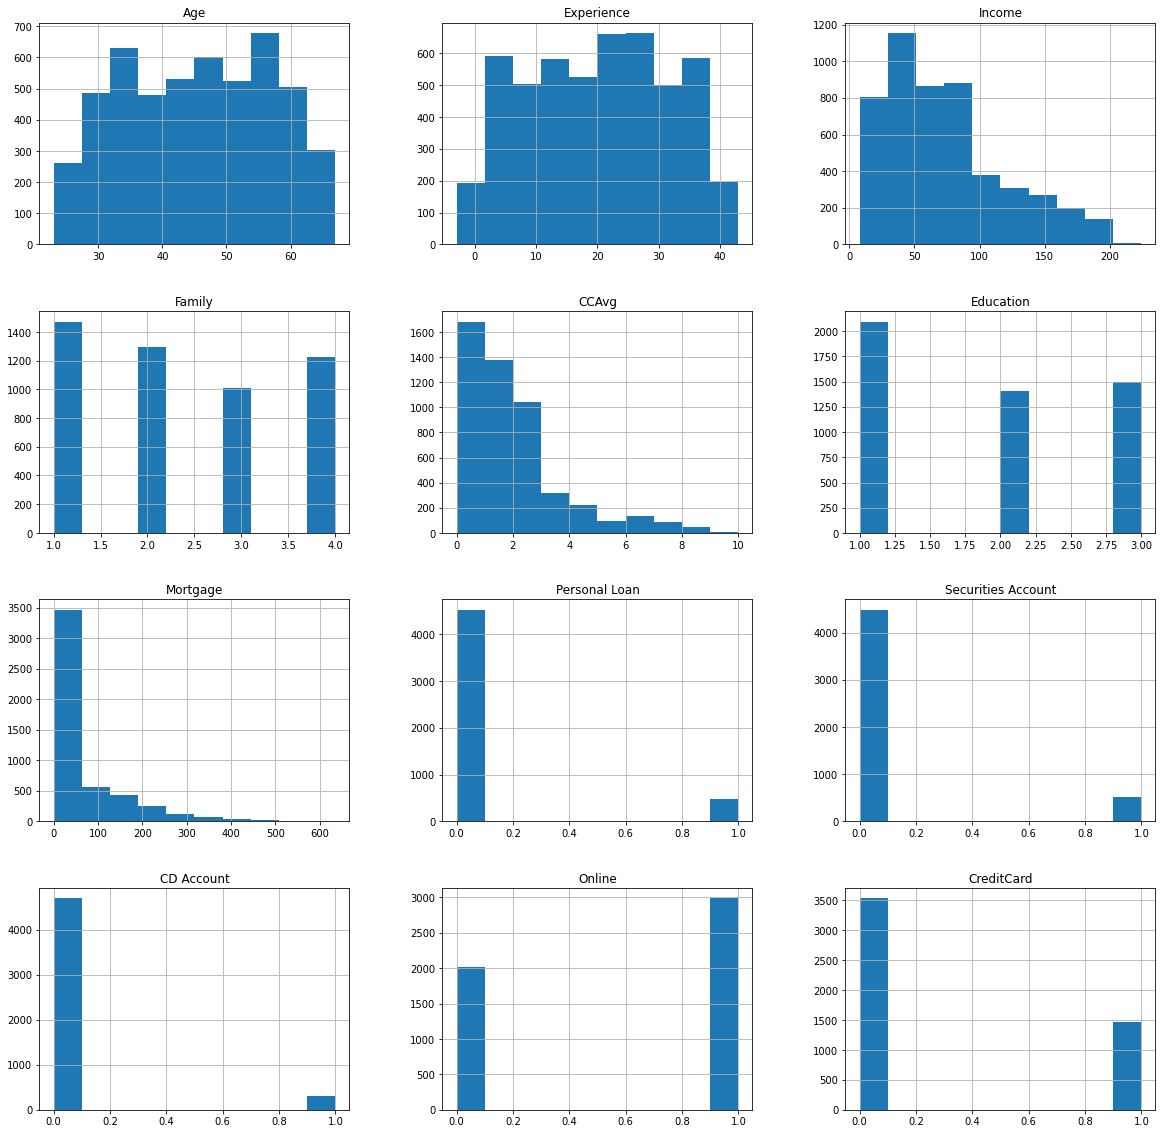

In [10]:
df.hist(figsize = (20,20))

In [11]:
sns.set_palette(sns.color_palette('hls', 8))

Text(0.5, 1.0, 'Distribution of experience')

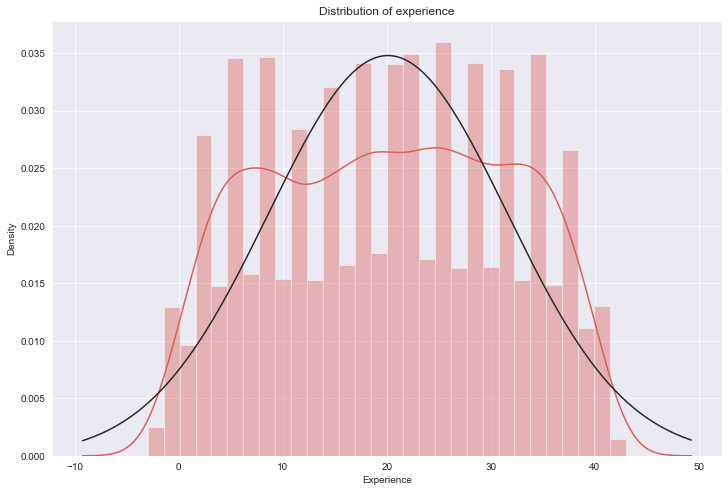

In [39]:
from scipy.stats import norm
sns.distplot(df['Experience'], bins  = 30, fit = norm)
plt.title('Distribution of experience')


#### **Handling the negative values in Experience column.**

In [6]:
df['Experience'].mean()

20.1046

In [7]:
negetive_exp = df[df['Experience']<0] 

In [15]:
negetive_exp.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0


In [16]:
print('There are {} records that have negetive values for experience, which is around {} percent'.format(
    negetive_exp.size, ((negetive_exp.size/df.size)*100)
))

There are 624 records that have negetive values for experience, which is around 1.04 percent


In [8]:
data = df.copy()

In [18]:
data['Experience'] = np.where(data['Experience']<0, data['Experience'].mean(),data['Experience'])

In [19]:
(data['Experience']<0).sum()

0

**Now that the negative values are resolved, let us look at the relation between the given features.**

<AxesSubplot:>

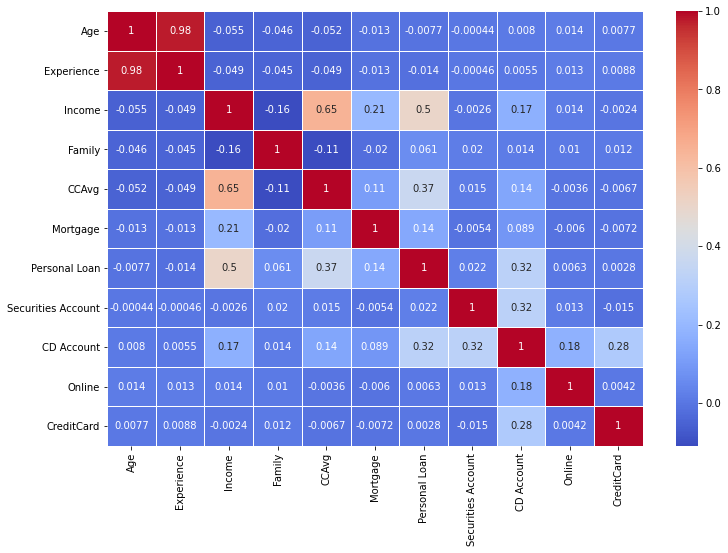

In [21]:
plt.rcParams['figure.figsize'] = [12, 8]
sns.heatmap(data.corr(), annot=True, cmap='coolwarm',
            linewidths=1, linecolor='white', robust = True)


**From the above heatmap, we can conclude that not a lot of features show dependency/relation with each other except for the Income and CCAvg column. There we have a case of multicolinearity.**

# **Getting to know the customers better:**

**Let us now look at the distribution of Education among the customers.**

In [20]:
#Mapping the integers with their appropriate labels
data['Education'] = data['Education'].map({ 1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'})

In [22]:
edu_dis = data.groupby('Education')['Age'].count().reset_index().rename(columns = {'Age' : 'Count'})
edu_dis

,Education,Count
0,Advanced/Professional,1501
1,Graduate,1403
2,Undergrad,2096


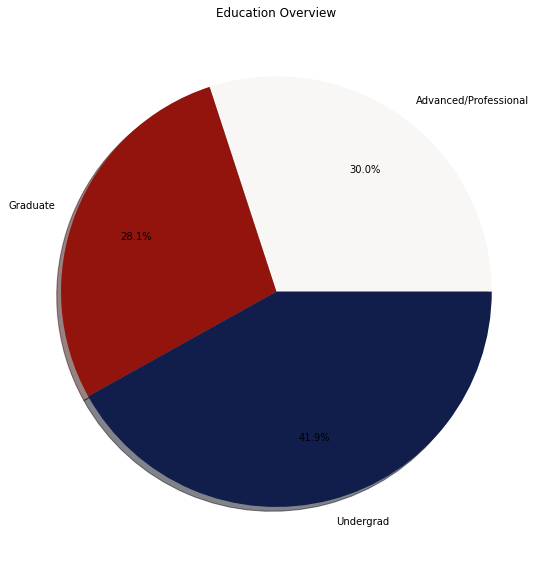

In [23]:
labels = edu_dis['Education']
colors = ['#F9F7F6', '#92140C', '#111D4A']
plt.figure(figsize=(8,8))
plt.pie(x=edu_dis['Count'], labels=labels, colors=colors, pctdistance=0.7, shadow=True, autopct="%.1f%%")
plt.title('Education Overview')
plt.tight_layout()


**We can see that a majority of the customers are undergrads.**

**So let's have a look if Education impacts the outcome of them taking a personal loan.**

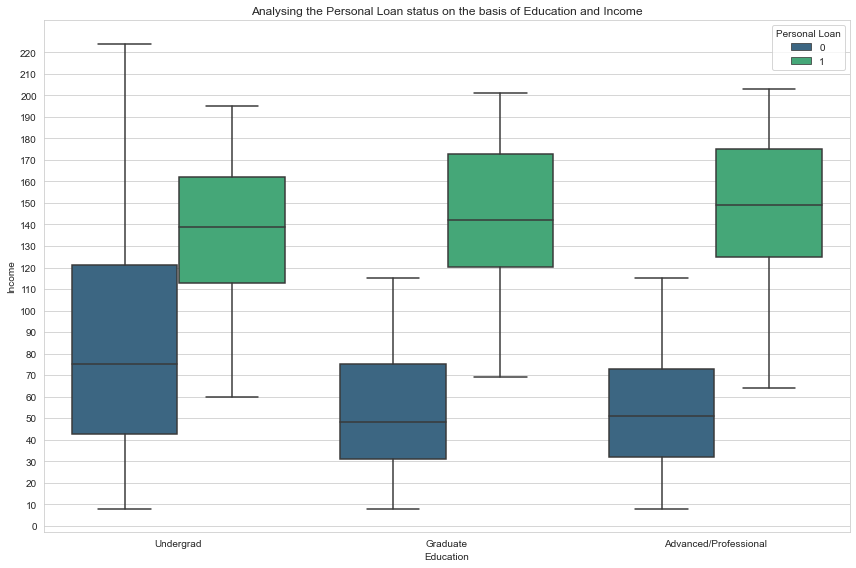

In [31]:
sns.set_style('whitegrid')
sns.boxplot(data= data, x = 'Education', y= 'Income', hue = 'Personal Loan', palette= 'viridis')
plt.yticks(np.arange(0, 230,10))
plt.title('Analysing the Personal Loan status on the basis of Education and Income')
plt.tight_layout()

**From the above plot we can conclude that:**
* The majority consisting of undergrads didnt opt to take the personal loan.
* The income of the people who took the personal loan ranged approximately between $115-175 
* The incomes of those who didnt take the loan belonging to the graduate and Advanced/Professional category are pretty much the same. 

**Looking at the info whether they have a Securities and Certificate Of Deposit account with the bank or not.**

In [25]:
#Creating fucntion containing the conditions 
def Account_holder(row):
    if (row['Securities Account'] == 1) & (row['CD Account'] == 1):
        return 'Holds Securities & Deposit'
    elif (row['Securities Account'] == 0) & (row['CD Account'] == 1):
        return 'Holds Only Deposit'
    elif (row['Securities Account'] == 1) & (row['CD Account'] == 0):
        return 'Holds Only Securities'
    if (row['Securities Account'] == 0) & (row['CD Account'] == 0):
        return "Doesn't Hold Securities or Deposit"

In [26]:
data['Account_holder_info']=  data.apply(Account_holder, axis = 1)

In [28]:
#Storing the values in a dataframe
values = data['Account_holder_info'].value_counts().reset_index().rename(columns= {
    'index':'account status', 'Account_holder_info':'counts'
})
values

,account status,counts
0,Doesn't Hold Securities or Deposit,4323
1,Holds Only Securities,375
2,Holds Only Deposit,155
3,Holds Securities & Deposit,147


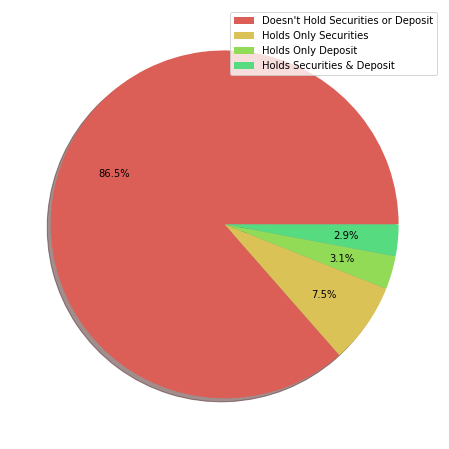

<Figure size 1440x720 with 0 Axes>

In [29]:
colors = ['#F9F7F6', '#92140C', '#111D4A', '#01902C']
plt.pie(values['counts'], pctdistance=0.7, shadow=True, autopct="%.1f%%")
plt.legend(labels=values['account status'], loc = 'upper right')
plt.figure(figsize = (20,10))
plt.tight_layout()


**Checking on income levels with respect to personal loan choice**

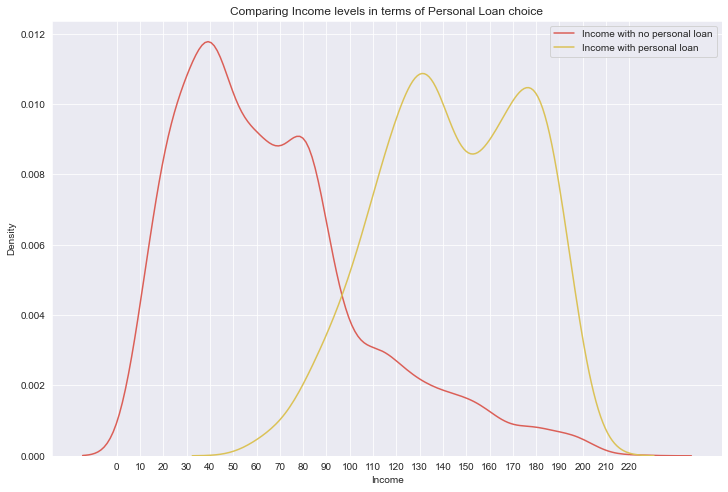

In [32]:
sns.set_style('darkgrid')
sns.distplot(data[data['Personal Loan'] == 0]['Income'], hist = False, label = 'Income with no personal loan')
sns.distplot(data[data['Personal Loan'] == 1]['Income'], hist = False, label = 'Income with personal loan')
plt.title('Comparing Income levels in terms of Personal Loan choice')
plt.xticks(np.arange(0,230,10))
plt.legend()

**We can see that the average income of the people who took the loan is approximately around $130-175**

**A large number of people who didnt take the loan considerably have less income levels**

In [35]:
col_name = ['Securities Account', 'Online' ,'CreditCard', 'Account_holder_info']


**Analysing the customers in terms with the following parameters**

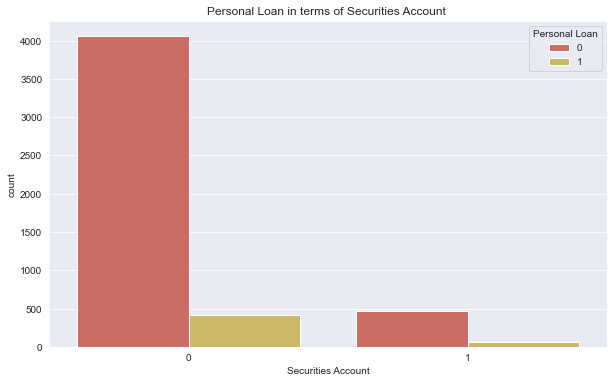

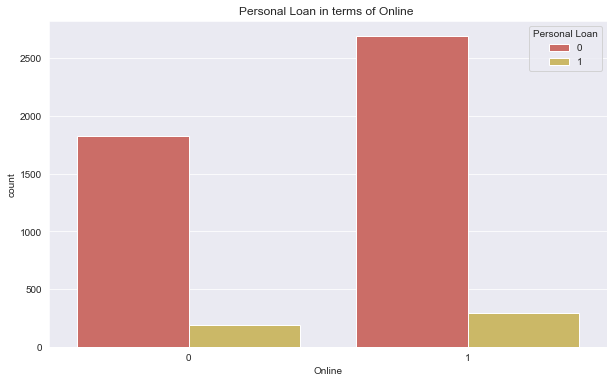

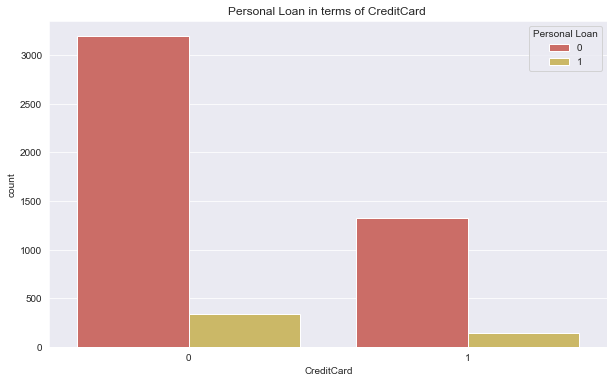

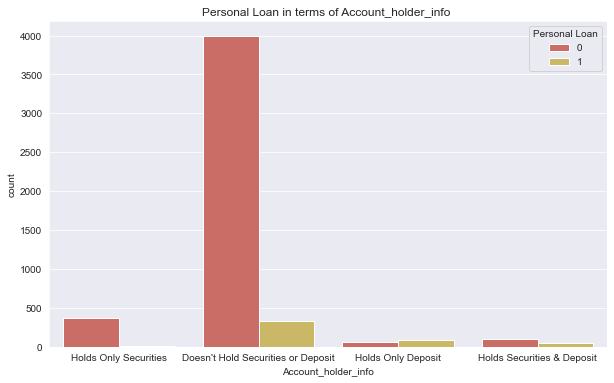

In [36]:
for i in col_name:
    plt.figure(figsize = (10,6))
    sns.countplot(data= data, x = i, hue = 'Personal Loan')
    plt.title("Personal Loan in terms of {} ".format(i))
